In [3]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.metrics
import numpy as np

In [4]:
################################################
## EE559
## Created by Arindam Jati
## Tested in Python 3.6.3, OSX El Captain
################################################

#import numpy as np
#import matplotlib.pyplot as plt

def plotSVMBoundaries(training, label_train, classifier, support_vectors = [], fsize=(6,4),legend_on = True):
    #Plot the decision boundaries and data points for minimum distance to
    #class mean classifier
    #
    # training: traning data
    # label_train: class lables correspond to training data
    # classifier: sklearn classifier model, must have a predict() function
    #
    # Total number of classes
    nclass =  max(np.unique(label_train))

    # Set the feature range for ploting
    max_x = np.ceil(max(training[:, 0])) + 0.01
    min_x = np.floor(min(training[:, 0])) - 0.01
    max_y = np.ceil(max(training[:, 1])) + 0.01
    min_y = np.floor(min(training[:, 1])) - 0.01

    xrange = (min_x, max_x)
    yrange = (min_y, max_y)

    # step size for how finely you want to visualize the decision boundary.
    inc = 0.05

    # generate grid coordinates. this will be the basis of the decision
    # boundary visualization.
    (x, y) = np.meshgrid(np.arange(xrange[0], xrange[1]+inc/100, inc), np.arange(yrange[0], yrange[1]+inc/100, inc))

    # size of the (x, y) image, which will also be the size of the
    # decision boundary image that is used as the plot background.
    image_size = x.shape
    xy = np.hstack( (x.reshape(x.shape[0]*x.shape[1], 1, order='F'), y.reshape(y.shape[0]*y.shape[1], 1, order='F')) ) # make (x,y) pairs as a bunch of row vectors.

    # distance measure evaluations for each (x,y) pair.
    pred_label = classifier.predict(xy)
    
    # reshape the idx (which contains the class label) into an image.
    decisionmap = pred_label.reshape(image_size, order='F')

    # documemtation: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html
    symbols_ar = np.array(['rx', 'bo', 'ms', 'cd','gp','y*','kx','gP','r+','bh'])
    mean_symbol_ar = np.array(['rd', 'bd', 'md', 'cd','gd','yd','kd','gd','rd','bd'])
    markerfacecolor_ar = np.array(['r', 'b', 'm', 'c','g','y','k','g','r','b'])

    #turn on interactive mode
    plt.figure(figsize=fsize)
    # plt.ion()

    #show the image, give each coordinate a color according to its class label
    plt.imshow(decisionmap, extent=[xrange[0], xrange[1], yrange[0], yrange[1]], origin='lower')

    if len(support_vectors)>0:
        sv_x = support_vectors[:, 0]
        sv_y = support_vectors[:, 1]
        plt.scatter(sv_x, sv_y, s = 100, c = 'green')
        # plot the class training data.
    plot_index = 0
    class_list = []
    class_list_name = [] #for legend
    mean_list = [] # for legend
    mean_lis_name = [] # for legend
    for cur_label in np.unique(label_train):
        # print(cur_label,plot_index,np.sum(label_train == cur_label))
        d1, = plt.plot(training[label_train == cur_label, 0],training[label_train == cur_label, 1], symbols_ar[plot_index])

        if legend_on:
            class_list.append(d1)
            class_list_name.append('Class '+str(plot_index))
            l = plt.legend(class_list,class_list_name, loc=2)
            plt.gca().add_artist(l)
       
        plot_index = plot_index + 1
    
        # # plot support vectors


    plt.show()

    # unique_labels = np.unique(label_train)
    # # plot the class training data.
    # plt.plot(training[label_train == unique_labels[0], 0],training[label_train == unique_labels[0], 1], 'rx')
    # plt.plot(training[label_train == unique_labels[1], 0],training[label_train == unique_labels[1], 1], 'go')
    # if nclass == 3:
    #     plt.plot(training[label_train == unique_labels[2], 0],training[label_train == unique_labels[2], 1], 'b*')

    # # include legend for training data
    # if nclass == 3:
    #     l = plt.legend(('Class 1', 'Class 2', 'Class 3'), loc=2)
    # else:
    #     l = plt.legend(('Class 1', 'Class 2'), loc=2)
    # plt.gca().add_artist(l)

    # # plot support vectors
    # if len(support_vectors)>0:
    #     sv_x = support_vectors[:, 0]
    #     sv_y = support_vectors[:, 1]
    #     plt.scatter(sv_x, sv_y, s = 100, c = 'blue')

    # plt.show()

In problems 1(a) - 1(b), you will be using Homework 1 dataset 1.

Use the Linear Kernel and try different values of slack variable parameter C. What is the
meaning of parameter C and how will it impact your classification? Set C = 0.01 and C = 1.
Report the above items and also provide the support vectors in the plots for each value of C.
Discuss your results and explain the performance and the differences for the different values
of C

In [5]:
# reading the data

# 1) Test Data
test_data1 = pd.read_csv("https://raw.githubusercontent.com/akimmi/EE559_hw1/main/dataset1_test.csv", header = None)
test_dataset1 = test_data1.to_numpy()
test1_features = test_dataset1[:,:2]
test1_class = test_dataset1[:,2]

# 2) Train data

train_data1 = pd.read_csv("https://raw.githubusercontent.com/akimmi/EE559_hw1/main/dataset1_train.csv", header = None)
train_dataset1 = train_data1.to_numpy()
train1_features = train_dataset1[:,:2]
train1_class = train_dataset1[:,2]

Paramater C represents as the regularization parameter

Training Accuracy is 100.0% when C=0.01
Testing Accuracy is 100.0% when C=0.01

w (weight vector)=[ 0.47617753 -0.53480959]
w0 (offset)=0.0636915652500464
Support Vectors = [[ 2.19929132  3.69039929]
 [-0.22111103  0.66801655]
 [ 0.49293496  1.63599988]
 [ 2.38349209  3.03218741]
 [ 1.13712786  2.31828414]
 [-1.02073547  0.26766422]
 [-0.56729058  0.64096728]
 [ 0.59560878  1.52144654]
 [-0.22862554  0.25995578]
 [-0.68307677  0.77811072]
 [-1.31467374 -0.2284476 ]
 [-1.36838283 -0.02790532]
 [-0.27512966  0.74678986]
 [-0.86053448  0.39736139]
 [-0.17144342  0.76899905]
 [-0.42714834  0.68511456]
 [ 0.5008731   1.4157754 ]
 [ 0.49579778  1.65522892]
 [ 0.79924873  2.05736087]
 [ 0.75268513  1.80975798]
 [ 0.87039876  1.86493455]
 [-0.31593348  0.5154707 ]
 [ 1.37393231  2.58265345]
 [-0.17934762  0.62860895]
 [-0.25017869  0.49434588]
 [ 0.64773632  1.78474002]
 [-0.22392623  0.45364466]
 [-0.40753748  0.64388851]
 [ 1.15297686  

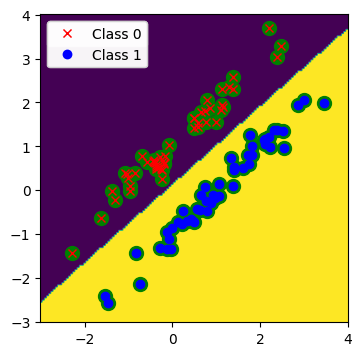

Testing Dataset 1 set as C=0.01



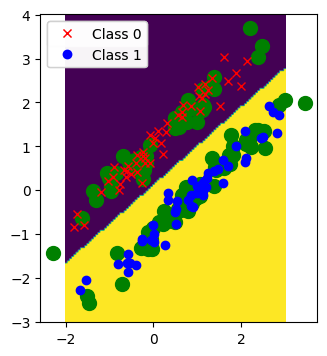

Training Accuracy is 100.0% when C=1
Testing Accuracy is 100.0% when C=1

w (weight vector)=[ 1.52672792 -1.54421194]
w0 (offset)=0.04306309183346128
Support Vectors = [[ 2.38349209  3.03218741]
 [-0.22862554  0.25995578]
 [-0.22392623  0.45364466]
 [ 1.00356818  1.55545471]
 [-0.8194963  -1.42969518]
 [ 1.77344668  1.25547895]
 [ 1.34639848  0.73273639]]

Training Dataset 1 set as C=1


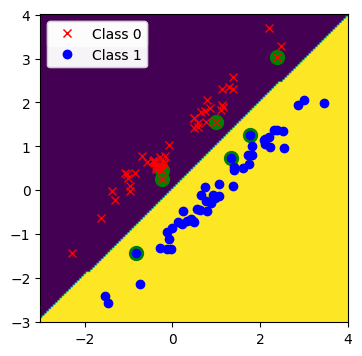

Testing Dataset 1 set as C=1



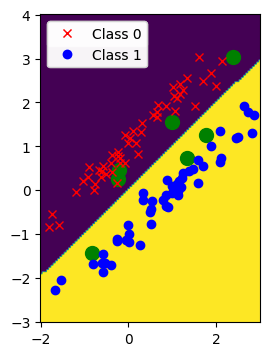

In [6]:
c = [0.01, 1] #regularization parameter
print("Paramater C represents as the regularization parameter\n")
for num in c:
  linear_kernel = SVC(kernel="linear", C=num)
  linear_kernel.fit(train1_features, train1_class)

  test1_predict = linear_kernel.predict(test1_features)
  train1_predict = linear_kernel.predict(train1_features)

  test_accuracy = sklearn.metrics.accuracy_score(test1_class, test1_predict)
  train_accuracy = sklearn.metrics.accuracy_score(train1_class, train1_predict)

  print(f"Training Accuracy is {train_accuracy * 100}% when C={num}")
  print(f"Testing Accuracy is {test_accuracy * 100}% when C={num}\n")

  print(f"w (weight vector)={linear_kernel.coef_[0]}")
  print(f"w0 (offset)={linear_kernel.intercept_[0]}")
  print(f"Support Vectors = {linear_kernel.support_vectors_}\n")

  print(f"Training Dataset 1 set as C={num}")
  plotSVMBoundaries(train1_features, train1_class, linear_kernel, support_vectors=linear_kernel.support_vectors_)

  print(f"Testing Dataset 1 set as C={num}\n")
  plotSVMBoundaries(test1_features, test1_class, linear_kernel, support_vectors=linear_kernel.support_vectors_)

 Use a Gaussian (RBF) Kernel with C parameter set to C = 0.01. Set γ = 1, 3, 10, 50.
Report the above items and also show the support vectors in the training-data plots for each
value of γ. Explain the linearity or nonlinearity of the decision boundary, and explain the
difference in decision regions for the various values of γ. State where (if anywhere) you observe
underfitting or overfitting

Training Accuracy is 99.0% when gamma=1
Testing Accuracy is 99.0% when gamma=1

Training Dataset 1 set as gamma=1


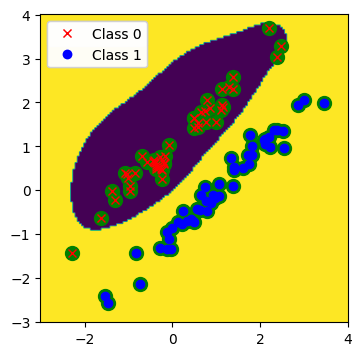

Testing Dataset 1 set as gamma=1



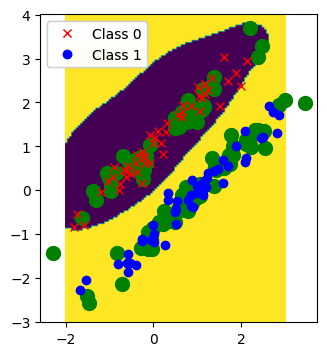

Training Accuracy is 95.0% when gamma=3
Testing Accuracy is 92.0% when gamma=3

Training Dataset 1 set as gamma=3


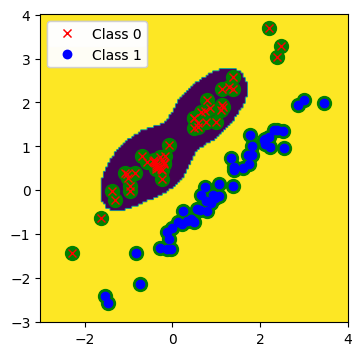

Testing Dataset 1 set as gamma=3



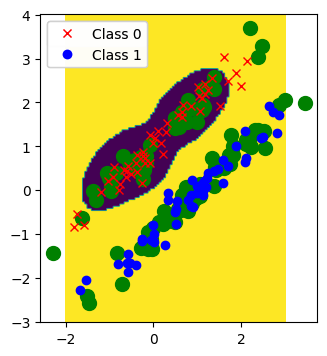

Training Accuracy is 88.0% when gamma=10
Testing Accuracy is 77.0% when gamma=10

Training Dataset 1 set as gamma=10


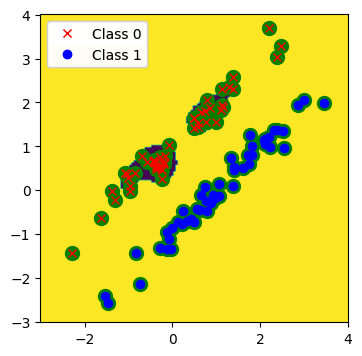

Testing Dataset 1 set as gamma=10



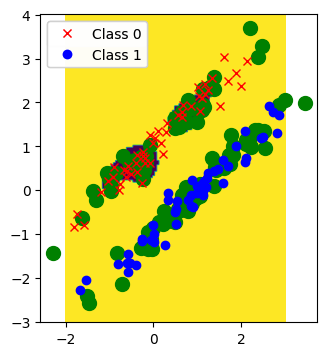

Training Accuracy is 79.0% when gamma=50
Testing Accuracy is 60.0% when gamma=50

Training Dataset 1 set as gamma=50


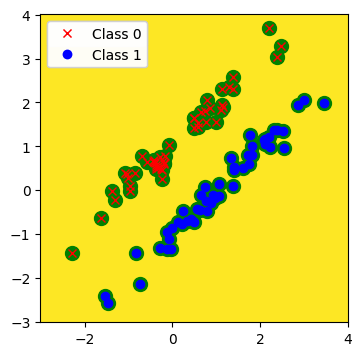

Testing Dataset 1 set as gamma=50



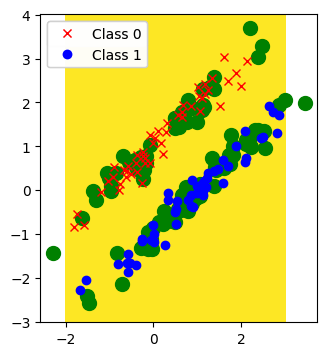

In [7]:
g = [1,3,10,50]
c = 0.01

for num in g:
  gaussian_kernel = SVC(C=c, kernel = "rbf", gamma=num)
  gaussian_kernel.fit(train1_features, train1_class)

  test1_predict = gaussian_kernel.predict(test1_features)
  train1_predict = gaussian_kernel.predict(train1_features)

  test_accuracy = sklearn.metrics.accuracy_score(test1_class, test1_predict)
  train_accuracy = sklearn.metrics.accuracy_score(train1_class, train1_predict)

  print(f"Training Accuracy is {train_accuracy * 100}% when gamma={num}")
  print(f"Testing Accuracy is {test_accuracy * 100}% when gamma={num}\n")

  print(f"Training Dataset 1 set as gamma={num}")
  plotSVMBoundaries(train1_features, train1_class, gaussian_kernel, support_vectors=gaussian_kernel.support_vectors_)

  print(f"Testing Dataset 1 set as gamma={num}\n")
  plotSVMBoundaries(test1_features, test1_class, gaussian_kernel, support_vectors=gaussian_kernel.support_vectors_)

In problems 1(c) - 1(e), you will be using Homework 1 dataset 3.

In [15]:
# 1) Test Data
test_data3 = pd.read_csv("https://raw.githubusercontent.com/akimmi/EE559_hw1/main/dataset3_test.csv", header = None)
test_dataset3 = test_data3.to_numpy()
test3_features = test_dataset3[:,:2]
test3_class = test_dataset3[:,2]

# 2) Train data

train_data3 = pd.read_csv("https://raw.githubusercontent.com/akimmi/EE559_hw1/main/dataset3_train.csv", header = None)
train_dataset3 = train_data3.to_numpy()
train3_features = train_dataset3[:,:2]
train3_class = train_dataset3[:,2]

Use the Linear Kernel and try different values of slack variable parameter C. Set C = 1
and C = 100. Report the above items for each value of C. Discuss your results. You will
provide 4 plots in total.

Training Accuracy is 76.0% when C=1
Testing Accuracy is 74.0% when C=1

w (weight vector)=[0.47927439 0.78667459]
w0 (offset)=-0.16998607354185055
Support Vectors = [[-3.18218116  1.96644083]
 [ 0.33801478 -0.90621088]
 [ 1.17837711  3.60142806]
 [ 1.04601153  2.95951526]
 [ 3.48719892 -1.88711189]
 [ 0.27257033  1.32269704]
 [ 1.17347805  1.21187743]
 [-0.48753857  0.76858642]
 [-0.14786511  0.8244982 ]
 [-0.68079504  0.57298126]
 [-1.10325263 -0.01428632]
 [ 0.69860778  2.17485997]
 [ 0.45597766  2.85726592]
 [ 4.18590014  1.3103195 ]
 [ 1.60690307  0.03458257]
 [-0.02832969 -0.420729  ]
 [-0.71754165  1.01085467]
 [-1.86498157  1.77056467]
 [ 0.27889619 -1.0043282 ]
 [-0.68281116 -0.63908943]
 [ 1.60139977  0.17776224]
 [-0.45506368  0.79536934]
 [-0.44720807  1.13514243]
 [ 3.20775231  1.91160833]
 [ 1.35240975  1.32747597]
 [-1.10754848 -0.19512252]
 [-3.64007736  1.20889011]
 [ 4.12858298  1.47898401]
 [ 0.01816077  3.47565138]
 [-0.67569672 -0.31302309]
 [-0.82889394  1.65452915

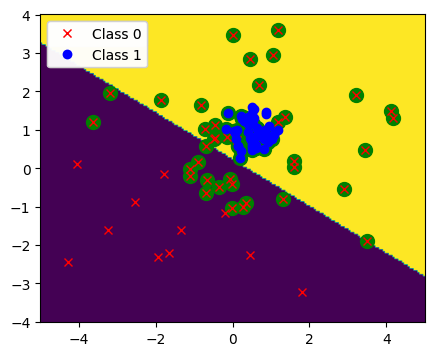

Testing Dataset 3 set as C=1



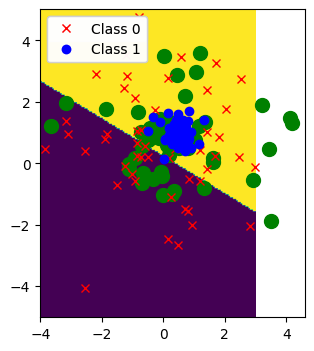

Training Accuracy is 77.0% when C=100
Testing Accuracy is 75.0% when C=100

w (weight vector)=[0.49088855 0.86936408]
w0 (offset)=-0.2641121309436542
Support Vectors = [[-3.18218116  1.96644083]
 [ 0.33801478 -0.90621088]
 [ 1.17837711  3.60142806]
 [ 1.04601153  2.95951526]
 [ 3.48719892 -1.88711189]
 [ 0.27257033  1.32269704]
 [ 1.17347805  1.21187743]
 [-0.48753857  0.76858642]
 [-0.14786511  0.8244982 ]
 [-0.68079504  0.57298126]
 [-1.10325263 -0.01428632]
 [ 0.69860778  2.17485997]
 [ 0.45597766  2.85726592]
 [ 4.18590014  1.3103195 ]
 [ 1.60690307  0.03458257]
 [-0.02832969 -0.420729  ]
 [-0.71754165  1.01085467]
 [-1.86498157  1.77056467]
 [ 0.27889619 -1.0043282 ]
 [ 1.60139977  0.17776224]
 [-0.45506368  0.79536934]
 [-0.44720807  1.13514243]
 [ 3.20775231  1.91160833]
 [ 1.35240975  1.32747597]
 [-1.10754848 -0.19512252]
 [-3.64007736  1.20889011]
 [ 4.12858298  1.47898401]
 [ 0.01816077  3.47565138]
 [-0.67569672 -0.31302309]
 [-0.82889394  1.65452915]
 [-0.90665717  0.16570

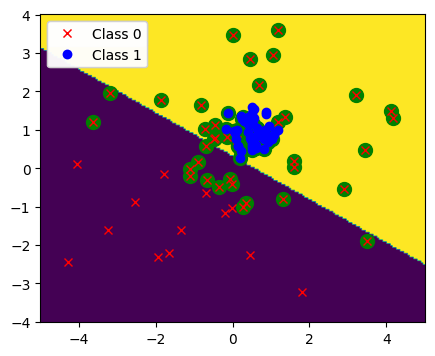

Testing Dataset 3 set as C=100



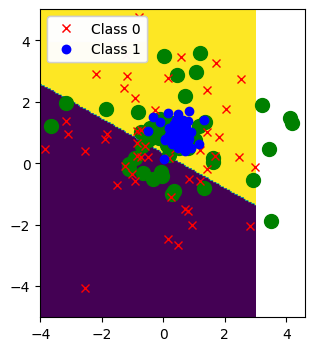

In [16]:
c = [1, 100]

for num in c:
  linear_kernel = SVC(kernel="linear", C=num)
  linear_kernel.fit(train3_features, train3_class)

  test3_predict = linear_kernel.predict(test3_features)
  train3_predict = linear_kernel.predict(train3_features)

  test_accuracy = sklearn.metrics.accuracy_score(test3_class, test3_predict)
  train_accuracy = sklearn.metrics.accuracy_score(train3_class, train3_predict)

  print(f"Training Accuracy is {train_accuracy * 100}% when C={num}")
  print(f"Testing Accuracy is {test_accuracy * 100}% when C={num}\n")

  print(f"w (weight vector)={linear_kernel.coef_[0]}")
  print(f"w0 (offset)={linear_kernel.intercept_[0]}")
  print(f"Support Vectors = {linear_kernel.support_vectors_}\n")

  print(f"Training Dataset 3 set as C={num}")
  plotSVMBoundaries(train3_features, train3_class, linear_kernel, support_vectors=linear_kernel.support_vectors_)

  print(f"Testing Dataset 3 set as C={num}\n")
  plotSVMBoundaries(test3_features, test3_class, linear_kernel, support_vectors=linear_kernel.support_vectors_)

Use a Gaussian (RBF) Kernel with C parameter set to C = 1. Set γ = 0.1, 10, 200. Report
the above items and also show the support vectors in the training-data plots for each value
of γ. Explain the difference in decision regions for the different values of γ.

Training Accuracy is 89.0% when gamma=0.1
Testing Accuracy is 89.0% when gamma=0.1

Training Dataset 3 set as gamma=0.1


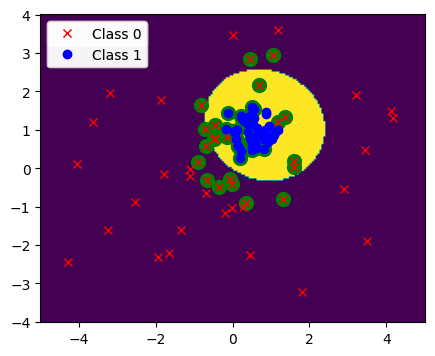

Testing Dataset 3 set as gamma=0.1



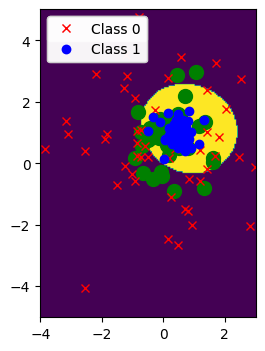

Training Accuracy is 98.0% when gamma=10
Testing Accuracy is 94.0% when gamma=10

Training Dataset 3 set as gamma=10


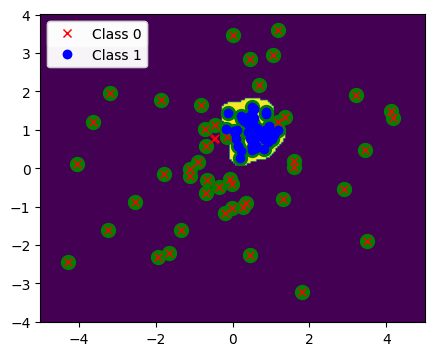

Testing Dataset 3 set as gamma=10



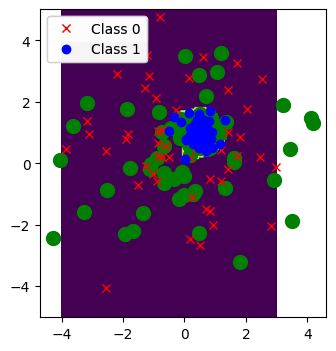

Training Accuracy is 98.0% when gamma=200
Testing Accuracy is 77.0% when gamma=200

Training Dataset 3 set as gamma=200


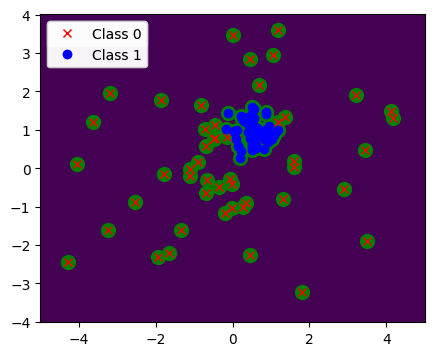

Testing Dataset 3 set as gamma=200



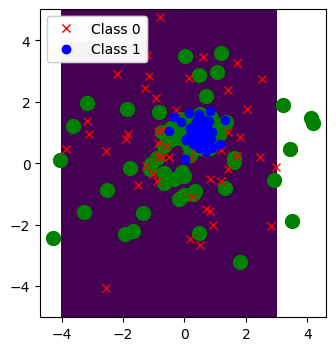

In [17]:
g = [0.1,10, 200]
c = 1

for num in g:
  gaussian_kernel = SVC(C=c, kernel = "rbf", gamma=num)
  gaussian_kernel.fit(train3_features, train3_class)

  test3_predict = gaussian_kernel.predict(test3_features)
  train3_predict = gaussian_kernel.predict(train3_features)

  test_accuracy = sklearn.metrics.accuracy_score(test3_class, test3_predict)
  train_accuracy = sklearn.metrics.accuracy_score(train3_class, train3_predict)

  print(f"Training Accuracy is {train_accuracy * 100}% when gamma={num}")
  print(f"Testing Accuracy is {test_accuracy * 100}% when gamma={num}\n")

  print(f"Training Dataset 3 set as gamma={num}")
  plotSVMBoundaries(train3_features, train3_class, gaussian_kernel, support_vectors=gaussian_kernel.support_vectors_)

  print(f"Testing Dataset 3 set as gamma={num}\n")
  plotSVMBoundaries(test3_features, test3_class, gaussian_kernel, support_vectors=gaussian_kernel.support_vectors_)

Use a Gaussian (RBF) Kernel and pick the γ parameter from part (d) (from the 3 given
values) that results in the minimum test error. Set C = 0.01, 1, 100. Report the above
items and also provide the support vectors in the plots for each value of C

Training Accuracy is 73.0% when gamma=0.1
Testing Accuracy is 71.0% when gamma=0.1

Training Dataset 3 set as gamma=0.1


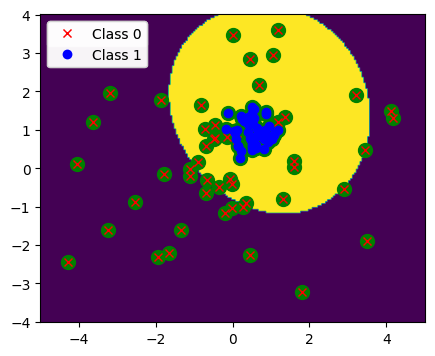

Testing Dataset 3 set as gamma=0.1



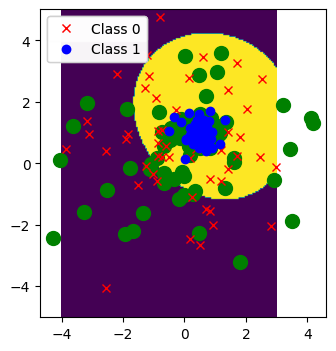

Training Accuracy is 88.0% when gamma=10
Testing Accuracy is 86.0% when gamma=10

Training Dataset 3 set as gamma=10


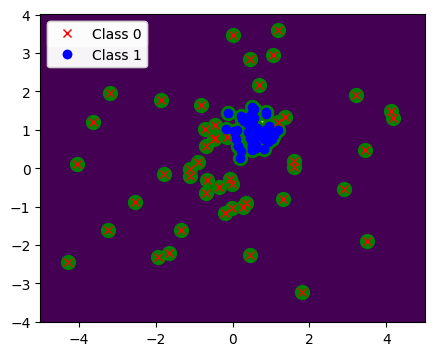

Testing Dataset 3 set as gamma=10



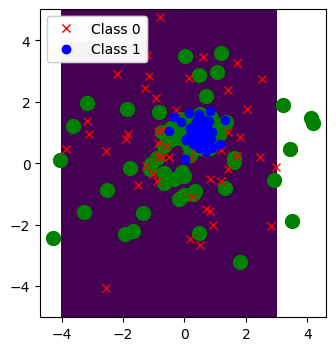

Training Accuracy is 99.0% when gamma=200
Testing Accuracy is 65.0% when gamma=200

Training Dataset 3 set as gamma=200


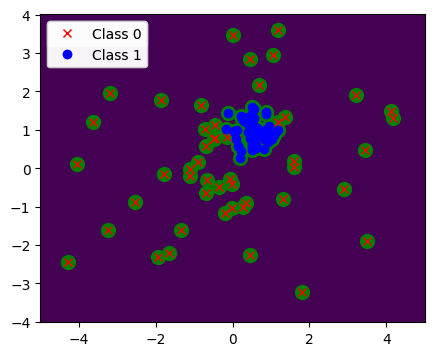

Testing Dataset 3 set as gamma=200



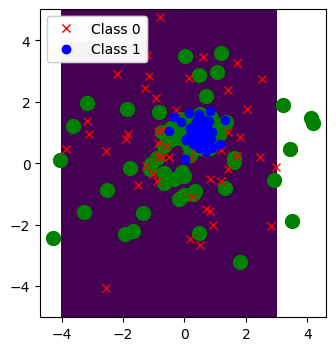

In [19]:
g = [0.1,10, 200]
c = 0.01

for num in g:
  gaussian_kernel = SVC(C=c, kernel = "rbf", gamma=num)
  gaussian_kernel.fit(train3_features, train3_class)

  test3_predict = gaussian_kernel.predict(test3_features)
  train3_predict = gaussian_kernel.predict(train3_features)

  test_accuracy = sklearn.metrics.accuracy_score(test3_class, test3_predict)
  train_accuracy = sklearn.metrics.accuracy_score(train3_class, train3_predict)

  print(f"Training Accuracy is {train_accuracy * 100}% when gamma={num}")
  print(f"Testing Accuracy is {test_accuracy * 100}% when gamma={num}\n")

  print(f"Training Dataset 3 set as gamma={num}")
  plotSVMBoundaries(train3_features, train3_class, gaussian_kernel, support_vectors=gaussian_kernel.support_vectors_)

  print(f"Testing Dataset 3 set as gamma={num}\n")
  plotSVMBoundaries(test3_features, test3_class, gaussian_kernel, support_vectors=gaussian_kernel.support_vectors_)

Training Accuracy is 89.0% when gamma=0.1
Testing Accuracy is 89.0% when gamma=0.1

Training Dataset 3 set as gamma=0.1


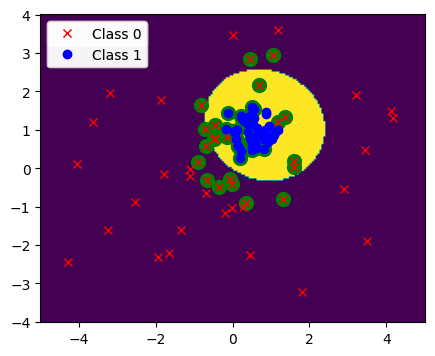

Testing Dataset 3 set as gamma=0.1



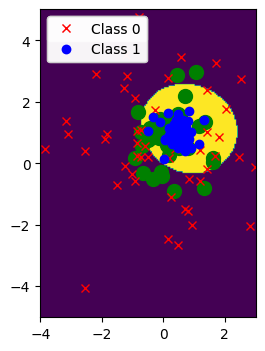

Training Accuracy is 98.0% when gamma=10
Testing Accuracy is 94.0% when gamma=10

Training Dataset 3 set as gamma=10


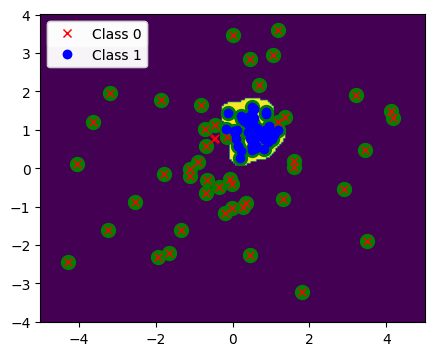

Testing Dataset 3 set as gamma=10



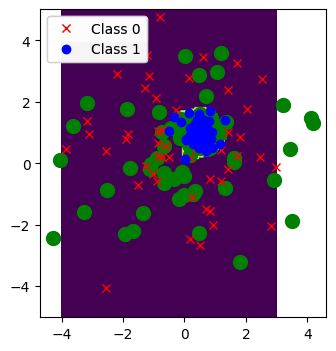

Training Accuracy is 98.0% when gamma=200
Testing Accuracy is 77.0% when gamma=200

Training Dataset 3 set as gamma=200


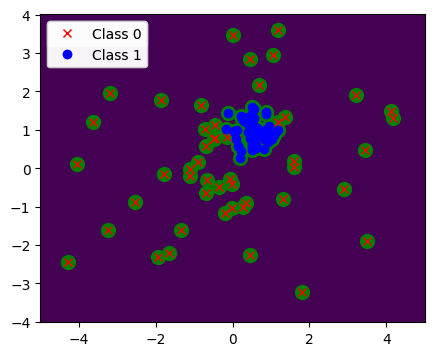

Testing Dataset 3 set as gamma=200



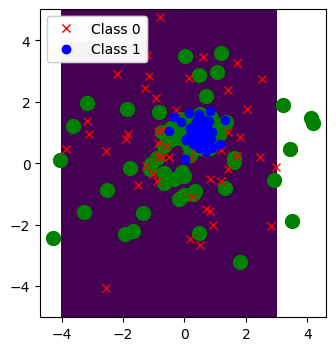

In [20]:
g = [0.1,10, 200]
c = 1

for num in g:
  gaussian_kernel = SVC(C=c, kernel = "rbf", gamma=num)
  gaussian_kernel.fit(train3_features, train3_class)

  test3_predict = gaussian_kernel.predict(test3_features)
  train3_predict = gaussian_kernel.predict(train3_features)

  test_accuracy = sklearn.metrics.accuracy_score(test3_class, test3_predict)
  train_accuracy = sklearn.metrics.accuracy_score(train3_class, train3_predict)

  print(f"Training Accuracy is {train_accuracy * 100}% when gamma={num}")
  print(f"Testing Accuracy is {test_accuracy * 100}% when gamma={num}\n")

  print(f"Training Dataset 3 set as gamma={num}")
  plotSVMBoundaries(train3_features, train3_class, gaussian_kernel, support_vectors=gaussian_kernel.support_vectors_)

  print(f"Testing Dataset 3 set as gamma={num}\n")
  plotSVMBoundaries(test3_features, test3_class, gaussian_kernel, support_vectors=gaussian_kernel.support_vectors_)

Training Accuracy is 96.0% when gamma=0.1
Testing Accuracy is 93.0% when gamma=0.1

Training Dataset 3 set as gamma=0.1


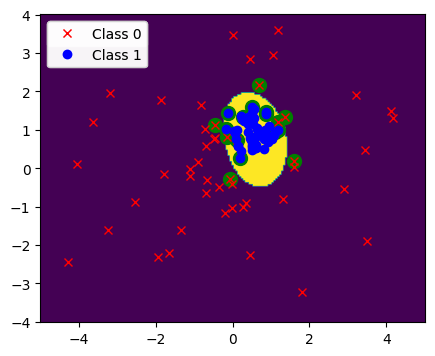

Testing Dataset 3 set as gamma=0.1



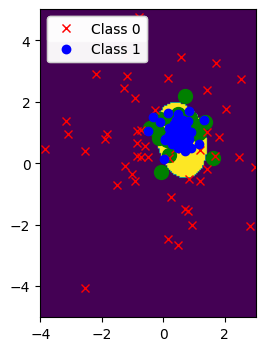

Training Accuracy is 98.0% when gamma=10
Testing Accuracy is 95.0% when gamma=10

Training Dataset 3 set as gamma=10


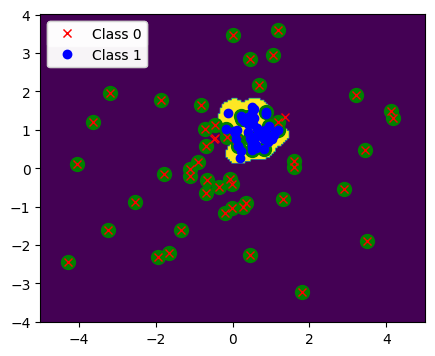

Testing Dataset 3 set as gamma=10



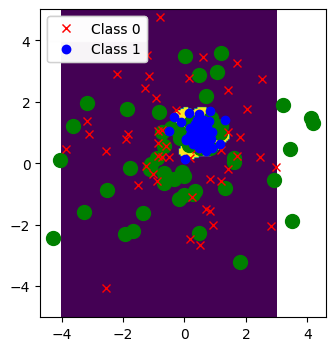

Training Accuracy is 100.0% when gamma=200
Testing Accuracy is 77.0% when gamma=200

Training Dataset 3 set as gamma=200


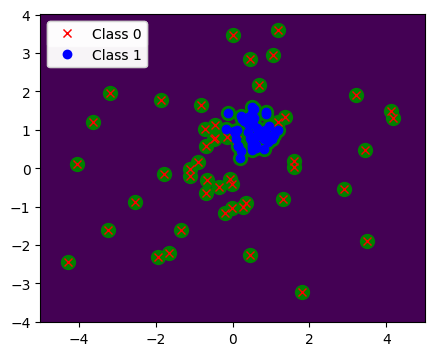

Testing Dataset 3 set as gamma=200



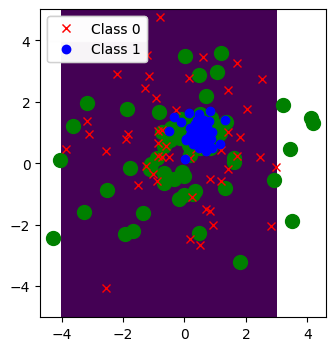

In [21]:
g = [0.1,10, 200]
c = 100

for num in g:
  gaussian_kernel = SVC(C=c, kernel = "rbf", gamma=num)
  gaussian_kernel.fit(train3_features, train3_class)

  test3_predict = gaussian_kernel.predict(test3_features)
  train3_predict = gaussian_kernel.predict(train3_features)

  test_accuracy = sklearn.metrics.accuracy_score(test3_class, test3_predict)
  train_accuracy = sklearn.metrics.accuracy_score(train3_class, train3_predict)

  print(f"Training Accuracy is {train_accuracy * 100}% when gamma={num}")
  print(f"Testing Accuracy is {test_accuracy * 100}% when gamma={num}\n")

  print(f"Training Dataset 3 set as gamma={num}")
  plotSVMBoundaries(train3_features, train3_class, gaussian_kernel, support_vectors=gaussian_kernel.support_vectors_)

  print(f"Testing Dataset 3 set as gamma={num}\n")
  plotSVMBoundaries(test3_features, test3_class, gaussian_kernel, support_vectors=gaussian_kernel.support_vectors_)